<a href="https://colab.research.google.com/github/Fatimakhanim/Deep-Learning-Projects/blob/main/06_transfer_learning_in_tensorflow_part_3_scaling_up.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://raw.githubusercontent.com/Rstam59/TaskDataRepoForStudents/main/helper_functions.py

--2024-08-05 15:26:12--  https://raw.githubusercontent.com/Rstam59/TaskDataRepoForStudents/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-08-05 15:26:12 (83.5 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import create_tensorboard_callback,plot_loss_curves, unzip_data, compare_historys,walk_through_dir

In [ ]:
# Download data from Google Storage (already preformatted)
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip

unzip_data("101_food_classes_10_percent.zip")

train_dir = "101_food_classes_10_percent/train/"
test_dir = "101_food_classes_10_percent/test/"

--2024-08-05 15:26:20--  https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.207, 172.253.117.207, 142.250.99.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1625420029 (1.5G) [application/zip]
Saving to: ‘101_food_classes_10_percent.zip’

101_food_classes_10 100%[===================>]   1.51G  41.4MB/s    in 43s     

2024-08-05 15:27:03 (35.7 MB/s) - ‘101_food_classes_10_percent.zip’ saved [1625420029/1625420029]



In [ ]:
walk_through_dir("101_food_classes_10_percent")

There are 2 directories and 0 images in '101_food_classes_10_percent'.
There are 101 directories and 0 images in '101_food_classes_10_percent/test'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/frozen_yogurt'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/lobster_bisque'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/tuna_tartare'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/chocolate_cake'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/hummus'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/caesar_salad'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/peking_duck'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/greek_salad'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/guacamole'.
There are 0 directories and 250 images

In [ ]:
import tensorflow as tf
IMG_SIZE = (224,224)
train_data_all_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                                label_mode = "categorical",
                                                                                image_size = IMG_SIZE)
test_data= tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                               label_mode = "categorical",
                                                               image_size = IMG_SIZE,
                                                               shuffle = False)

Found 7575 files belonging to 101 classes.
Found 25250 files belonging to 101 classes.


In [ ]:
checkpoint_path = "101_classes_10_percemt_data_model_checkpoint.weights.h5"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                         save_weights_only = True,
                                                         monitor = "val_accuracy",
                                                         save_best_only = True)

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

data_augmentation = Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2),
],name = "data_augmentation")

In [ ]:
base_model = tf.keras.applications.efficientnet.EfficientNetB0(include_top = False)
base_model.trainable = False

inputs = layers.Input(shape = (224,224,3),name = "input_layer")
x = data_augmentation(inputs)
x = base_model(x, training = False)
x = layers.GlobalAveragePooling2D(name = "global_average_pooling")(x)
outputs = layers.Dense(len(train_data_all_10_percent.class_names),activation ="softmax",name ="output_layer")(x)

model = tf.keras.Model(inputs,outputs)

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ data_augmentation (Sequential)       │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetb0 (Functional)          │ (None, None, None, 1280)    │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling               │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 101)                 │         129,381 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,178,952 (15.94 MB)

 Trainable params: 129,381 (505.39 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [ ]:
model.compile(loss = "categorical_crossentropy",
              metrics = ["accuracy"],
              optimizer = "adam")

In [ ]:
history_all_classes_10_percent = model.fit(train_data_all_10_percent,
                                           epochs = 5,
                                           validation_data = test_data,
                                           validation_steps = int(0.15*len(test_data)),
                                           callbacks = [checkpoint_callback])

Epoch 1/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 59s 189ms/step - accuracy: 0.1302 - loss: 4.0775 - val_accuracy: 0.4150 - val_loss: 2.7132
Epoch 2/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 42s 177ms/step - accuracy: 0.4040 - loss: 2.6251 - val_accuracy: 0.4619 - val_loss: 2.2041
Epoch 3/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 44s 185ms/step - accuracy: 0.4853 - loss: 2.1907 - val_accuracy: 0.5191 - val_loss: 1.9316
Epoch 4/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 78s 170ms/step - accuracy: 0.5285 - loss: 1.9697 - val_accuracy: 0.5636 - val_loss: 1.7845
Epoch 5/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 42s 173ms/step - accuracy: 0.5644 - loss: 1.8143 - val_accuracy: 0.5900 - val_loss: 1.6457


In [ ]:
result_feature_extraction_model = model.evaluate(test_data)

790/790 ━━━━━━━━━━━━━━━━━━━━ 59s 74ms/step - accuracy: 0.5187 - loss: 1.8867


In [ ]:
base_model.trainable=False
for layer in base_model.layers[-5:]:
  layer.trainable=True

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              metrics=['accuracy'])

In [ ]:
for layer in model.layers:
  print(layer.name,layer.trainable)

input_layer True
data_augmentation True
efficientnetb0 False
global_average_pooling True
output_layer True


In [ ]:
for layer in base_model.layers:
  print(layer.name,layer.trainable)

input_layer False
rescaling False
normalization False
rescaling_1 False
stem_conv_pad False
stem_conv False
stem_bn False
stem_activation False
block1a_dwconv False
block1a_bn False
block1a_activation False
block1a_se_squeeze False
block1a_se_reshape False
block1a_se_reduce False
block1a_se_expand False
block1a_se_excite False
block1a_project_conv False
block1a_project_bn False
block2a_expand_conv False
block2a_expand_bn False
block2a_expand_activation False
block2a_dwconv_pad False
block2a_dwconv False
block2a_bn False
block2a_activation False
block2a_se_squeeze False
block2a_se_reshape False
block2a_se_reduce False
block2a_se_expand False
block2a_se_excite False
block2a_project_conv False
block2a_project_bn False
block2b_expand_conv False
block2b_expand_bn False
block2b_expand_activation False
block2b_dwconv False
block2b_bn False
block2b_activation False
block2b_se_squeeze False
block2b_se_reshape False
block2b_se_reduce False
block2b_se_expand False
block2b_se_excite False
block2b_

In [ ]:
fine_tune_epochs = 10

history_all_classes_10_percent_fine_tune = model.fit(train_data_all_10_percent,
                                                     epochs = fine_tune_epochs,
                                                     validation_data = test_data,
                                                     validation_steps = int(0.15*len(test_data)),
                                                     initial_epoch = history_all_classes_10_percent.epoch[-1]
                                                     )


Epoch 5/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 54s 178ms/step - accuracy: 0.5735 - loss: 1.7755 - val_accuracy: 0.5024 - val_loss: 1.9445
Epoch 6/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 41s 174ms/step - accuracy: 0.6162 - loss: 1.5694 - val_accuracy: 0.5289 - val_loss: 1.7818
Epoch 7/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 40s 170ms/step - accuracy: 0.6387 - loss: 1.4759 - val_accuracy: 0.5988 - val_loss: 1.5776
Epoch 8/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 45s 188ms/step - accuracy: 0.6559 - loss: 1.4132 - val_accuracy: 0.5771 - val_loss: 1.6419
Epoch 9/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 78s 171ms/step - accuracy: 0.6607 - loss: 1.3410 - val_accuracy: 0.6224 - val_loss: 1.4404
Epoch 10/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 40s 167ms/step - accuracy: 0.6788 - loss: 1.2997 - val_accuracy: 0.6051 - val_loss: 1.4490


In [ ]:
results_all_classes_10_percent_fine_tune = model.evaluate(test_data)

790/790 ━━━━━━━━━━━━━━━━━━━━ 65s 82ms/step - accuracy: 0.5533 - loss: 1.7079


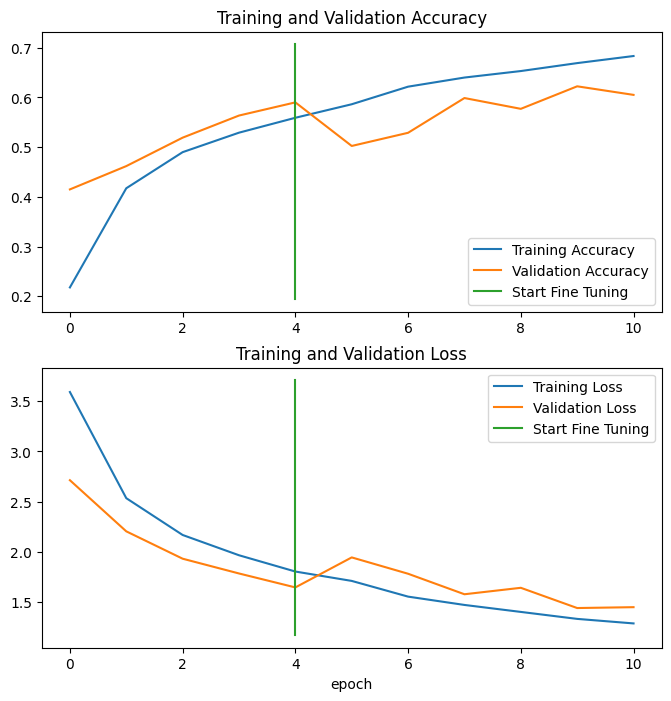

In [ ]:
compare_historys(original_history = history_all_classes_10_percent,
                 new_history =history_all_classes_10_percent_fine_tune,
                 initial_epochs = 5)

Making Predictions with our trained model

In [ ]:
pred_probs = model.predict(test_data,verbose = 1)

790/790 ━━━━━━━━━━━━━━━━━━━━ 67s 80ms/step


In [ ]:
pred_classes = pred_probs.argmax(axis = 1)
pred_classes[:10]

array([ 2,  0,  0,  8,  8, 78, 29,  0, 85,  0])

In [ ]:
y_labels = []
for images,labels in test_data.unbatch():
  y_labels.append(labels.numpy().argmax())

y_labels[:10]


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
len(y_labels)

25250

In [ ]:
from sklearn.metrics import accuracy_score
sklearn_accuracy = accuracy_score(y_labels,pred_classes)
sklearn_accuracy

0.5756831683168316

In [ ]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If None, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
    norm: normalize values or not (default=False).
    savefig: save confusion matrix to file (default=False).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ### Added: Rotate xticks for readability & increase font size (required due to such a large confusion matrix)
  plt.xticks(rotation=70, fontsize=text_size)
  plt.yticks(fontsize=text_size)

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

In [ ]:
class_names = test_data.class_names
class_names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

In [ ]:
make_confusion_matrix(y_true = y_labels,
                      y_pred = pred_classes,
                      classes = class_names,
                      figsize = (100,100),
                      text_size = 20,
                      norm = False,
                      savefig = True)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_labels, pred_classes))

              precision    recall  f1-score   support

           0       0.32      0.19      0.24       250
           1       0.46      0.69      0.56       250
           2       0.58      0.54      0.56       250
           3       0.77      0.51      0.61       250
           4       0.47      0.50      0.48       250
           5       0.35      0.36      0.36       250
           6       0.78      0.70      0.74       250
           7       0.78      0.72      0.75       250
           8       0.22      0.54      0.31       250
           9       0.42      0.58      0.49       250
          10       0.48      0.42      0.45       250
          11       0.75      0.54      0.63       250
          12       0.74      0.58      0.65       250
          13       0.49      0.60      0.54       250
          14       0.42      0.60      0.49       250
          15       0.34      0.30      0.32       250
          16       0.63      0.54      0.58       250
          17       0.38    

In [ ]:
from sklearn.metrics import classification_report
classification_report_dict = classification_report(y_labels, pred_classes,output_dict = True)
classification_report_dict

{'0': {'precision': 0.3197278911564626,
  'recall': 0.188,
  'f1-score': 0.23677581863979846,
  'support': 250.0},
 '1': {'precision': 0.46380697050938335,
  'recall': 0.692,
  'f1-score': 0.5553772070626004,
  'support': 250.0},
 '2': {'precision': 0.576271186440678,
  'recall': 0.544,
  'f1-score': 0.5596707818930041,
  'support': 250.0},
 '3': {'precision': 0.7650602409638554,
  'recall': 0.508,
  'f1-score': 0.6105769230769231,
  'support': 250.0},
 '4': {'precision': 0.4681647940074906,
  'recall': 0.5,
  'f1-score': 0.48355899419729204,
  'support': 250.0},
 '5': {'precision': 0.35294117647058826,
  'recall': 0.36,
  'f1-score': 0.3564356435643565,
  'support': 250.0},
 '6': {'precision': 0.7822222222222223,
  'recall': 0.704,
  'f1-score': 0.7410526315789474,
  'support': 250.0},
 '7': {'precision': 0.776824034334764,
  'recall': 0.724,
  'f1-score': 0.7494824016563146,
  'support': 250.0},
 '8': {'precision': 0.22259136212624583,
  'recall': 0.536,
  'f1-score': 0.3145539906103

In [ ]:
class_f1_scores = {}
for k, v in classification_report_dict.items():
  if k == "accuracy":
    break
  else:
    class_f1_scores[class_names[int(k)]] = v["f1-score"]

class_f1_scores

{'apple_pie': 0.23677581863979846,
 'baby_back_ribs': 0.5553772070626004,
 'baklava': 0.5596707818930041,
 'beef_carpaccio': 0.6105769230769231,
 'beef_tartare': 0.48355899419729204,
 'beet_salad': 0.3564356435643565,
 'beignets': 0.7410526315789474,
 'bibimbap': 0.7494824016563146,
 'bread_pudding': 0.3145539906103286,
 'breakfast_burrito': 0.48911222780569513,
 'bruschetta': 0.4482029598308668,
 'caesar_salad': 0.627906976744186,
 'cannoli': 0.6487695749440716,
 'caprese_salad': 0.5392857142857143,
 'carrot_cake': 0.49419568822553894,
 'ceviche': 0.3171247357293869,
 'cheese_plate': 0.582441113490364,
 'cheesecake': 0.40301318267419967,
 'chicken_curry': 0.4362934362934363,
 'chicken_quesadilla': 0.5835294117647057,
 'chicken_wings': 0.697508896797153,
 'chocolate_cake': 0.5341880341880342,
 'chocolate_mousse': 0.34368530020703936,
 'churros': 0.7191011235955057,
 'clam_chowder': 0.6918238993710693,
 'club_sandwich': 0.657258064516129,
 'crab_cakes': 0.3553530751708428,
 'creme_brule

In [ ]:
# Turn f1-scores into dataframe for visualization
import pandas as pd
f1_scores = pd.DataFrame({"class_name": list(class_f1_scores.keys()),
                          "f1-score": list(class_f1_scores.values())}).sort_values("f1-score", ascending=False)
f1_scores.head()

,class_name,f1-score
33,edamame,0.958580
75,pho,0.841463
63,macarons,0.831461
54,hot_and_sour_soup,0.825651
45,frozen_yogurt,0.821429


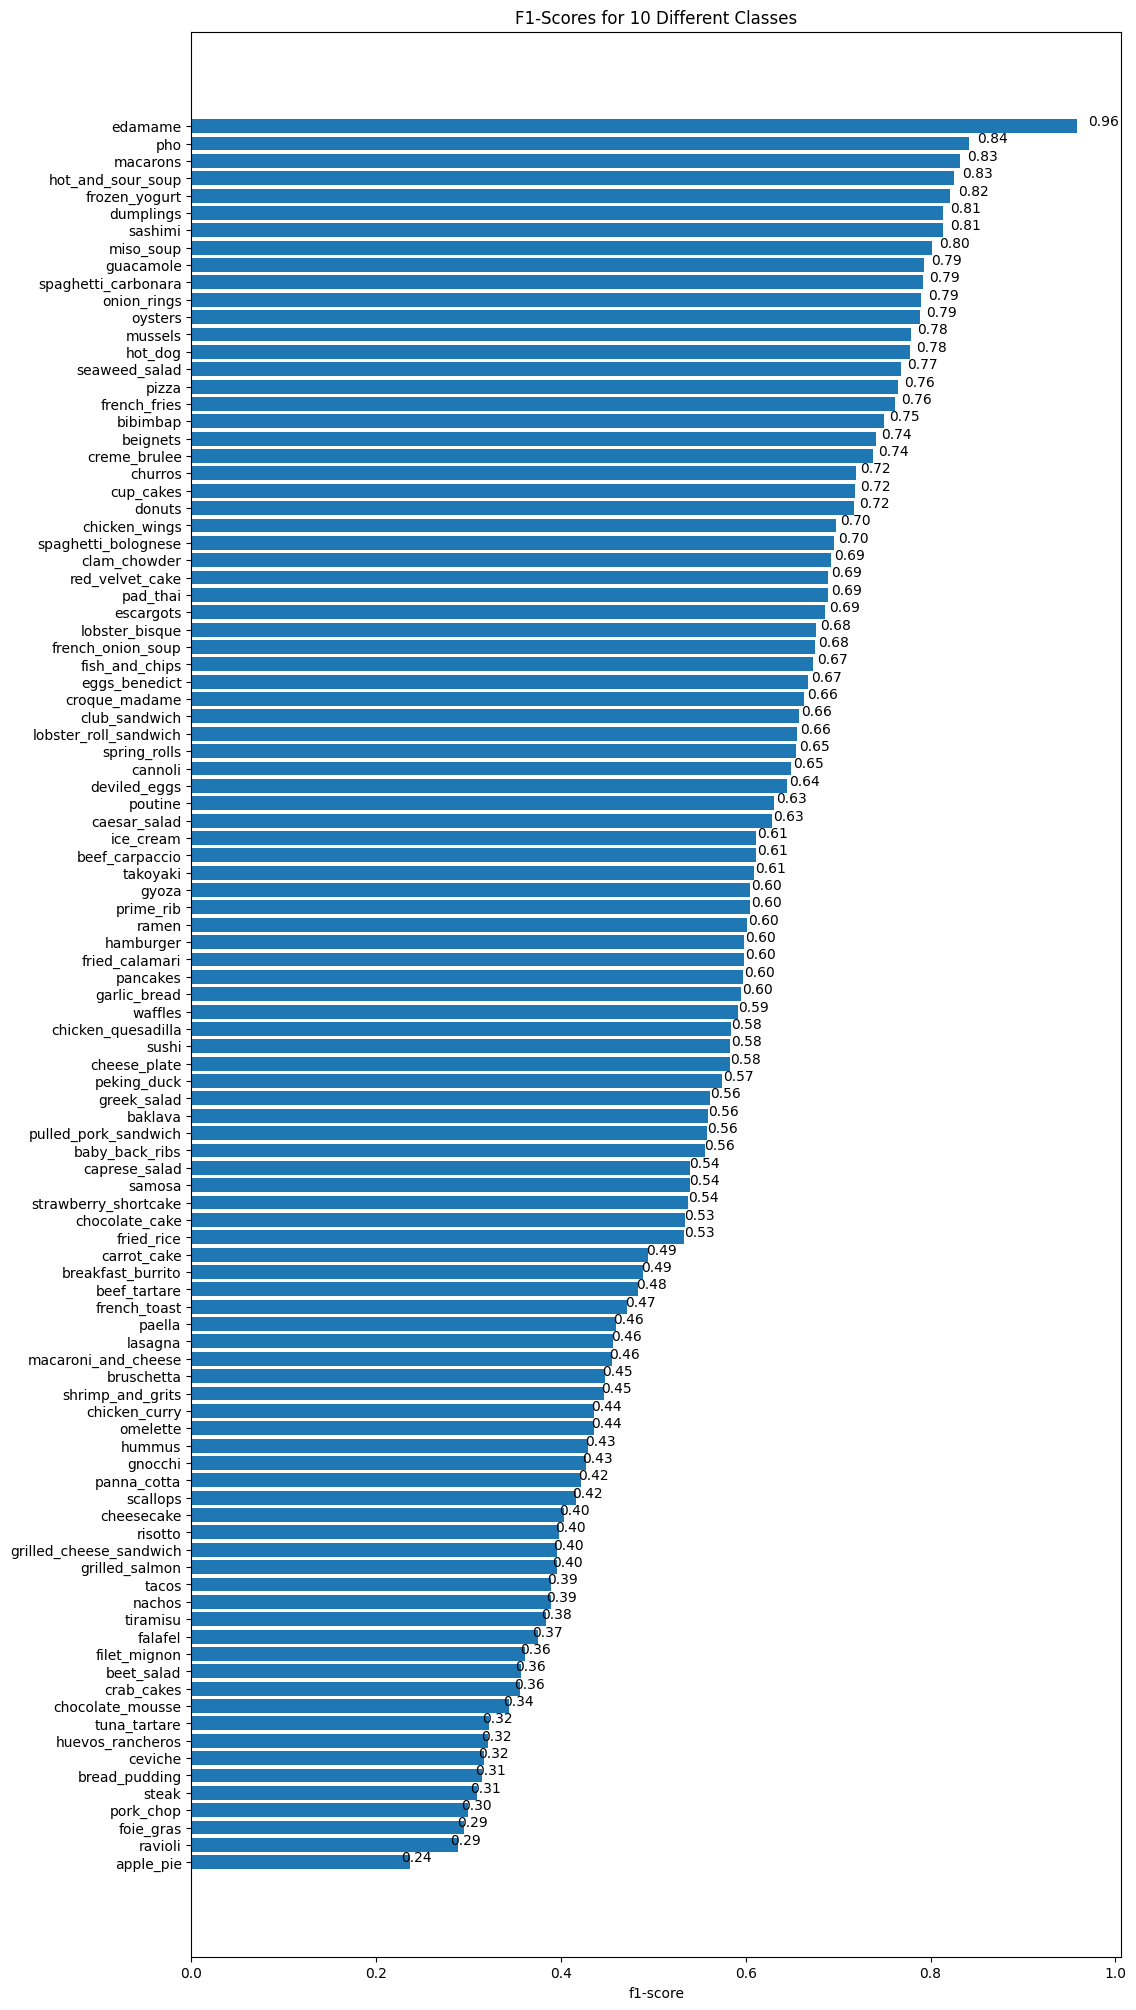

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 25))
scores = ax.barh(range(len(f1_scores)), f1_scores["f1-score"].values)
ax.set_yticks(range(len(f1_scores)))
ax.set_yticklabels(list(f1_scores["class_name"]))
ax.set_xlabel("f1-score")
ax.set_title("F1-Scores for 10 Different Classes")
ax.invert_yaxis(); # reverse the order

def autolabel(rects): # Modified version of: https://matplotlib.org/examples/api/barchart_demo.html
  """
  Attach a text label above each bar displaying its height (it's value).
  """
  for rect in rects:
    width = rect.get_width()
    ax.text(1.03*width, rect.get_y() + rect.get_height()/1.5,
            f"{width:.2f}",
            ha='center', va='bottom')

autolabel(scores)

In [ ]:
def load_and_prep_image(filename,img_shape = 224, scale = True):
  img = tf.io.read_file(filename)
  img = tf.io.decode_image(img)
  img = tf.image.resize(img, [img_shape,img_shape])

  if scale:

    return img/255.

  else:
    return img


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


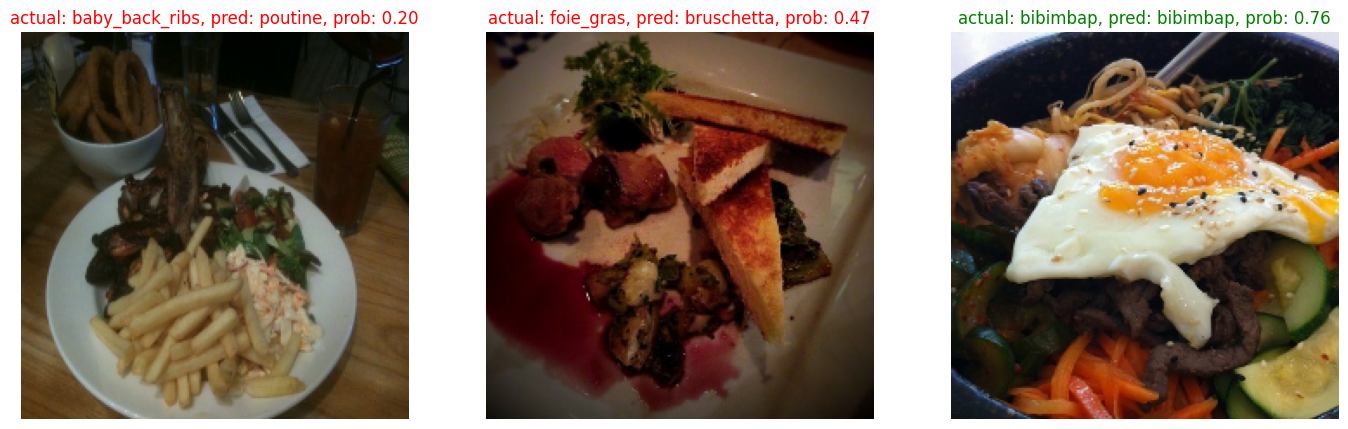

In [ ]:
# Make preds on a series of random images
import os
import random

plt.figure(figsize=(17, 10))
for i in range(3):
  # Choose a random image from a random class
  class_name = random.choice(class_names)
  filename = random.choice(os.listdir(test_dir + "/" + class_name))
  filepath = test_dir + class_name + "/" + filename

  # Load the image and make predictions
  img = load_and_prep_image(filepath, scale=False) # don't scale images for EfficientNet predictions
  pred_prob = model.predict(tf.expand_dims(img, axis=0)) # model accepts tensors of shape [None, 224, 224, 3]
  pred_class = class_names[pred_prob.argmax()] # find the predicted class

  # Plot the image(s)
  plt.subplot(1, 3, i+1)
  plt.imshow(img/255.)
  if class_name == pred_class: # Change the color of text based on whether prediction is right or wrong
    title_color = "g"
  else:
    title_color = "r"
  plt.title(f"actual: {class_name}, pred: {pred_class}, prob: {pred_prob.max():.2f}", c=title_color)
  plt.axis(False);

In [ ]:
filepaths = []
for filepath in test_data.list_files("/content/101_food_classes_10_percent/test/*/*.jpg",
                                     shuffle = False):
  filepaths.append(filepath.numpy())

filepaths[:10] # Slice the list filepaths, not the tensor filepath

[b'/content/101_food_classes_10_percent/test/apple_pie/1011328.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/101251.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1034399.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/103801.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1038694.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1047447.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1068632.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/110043.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1106961.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1113017.jpg']

In [ ]:
import pandas as pd
pred_df = pd.DataFrame({"img_path": filepaths,
                        "y_true": y_labels,
                        "y_pred": pred_classes,
                        "pred_conf": pred_probs.max(axis=1), # get the maximum prediction probability value
                        "y_true_classname": [class_names[i] for i in y_labels],
                        "y_pred_classname": [class_names[i] for i in pred_classes]})
pred_df.head()

,img_path,y_true,y_pred,pred_conf,y_true_classname,y_pred_classname
0,b'/content/101_food_classes_10_percent/test/ap...,0,2,0.250749,apple_pie,baklava
1,b'/content/101_food_classes_10_percent/test/ap...,0,0,0.814089,apple_pie,apple_pie
2,b'/content/101_food_classes_10_percent/test/ap...,0,0,0.241764,apple_pie,apple_pie
3,b'/content/101_food_classes_10_percent/test/ap...,0,8,0.128391,apple_pie,bread_pudding
4,b'/content/101_food_classes_10_percent/test/ap...,0,8,0.388205,apple_pie,bread_pudding


In [ ]:
pred_df["pred_correct"] = pred_df["y_true"]==pred_df["y_pred"]
pred_df.head()

,img_path,y_true,y_pred,pred_conf,y_true_classname,y_pred_classname,pred_correct
0,b'/content/101_food_classes_10_percent/test/ap...,0,2,0.250749,apple_pie,baklava,False
1,b'/content/101_food_classes_10_percent/test/ap...,0,0,0.814089,apple_pie,apple_pie,True
2,b'/content/101_food_classes_10_percent/test/ap...,0,0,0.241764,apple_pie,apple_pie,True
3,b'/content/101_food_classes_10_percent/test/ap...,0,8,0.128391,apple_pie,bread_pudding,False
4,b'/content/101_food_classes_10_percent/test/ap...,0,8,0.388205,apple_pie,bread_pudding,False


In [ ]:
top_100_wrong = pred_df[pred_df["pred_correct"]==False].sort_values("pred_conf",ascending = False)[:10]
top_100_wrong.head(20)

,img_path,y_true,y_pred,pred_conf,y_true_classname,y_pred_classname,pred_correct
10847,b'/content/101_food_classes_10_percent/test/fr...,43,68,0.995096,fried_calamari,onion_rings,False
22,b'/content/101_food_classes_10_percent/test/ap...,0,100,0.994295,apple_pie,waffles,False
17816,b'/content/101_food_classes_10_percent/test/pa...,71,70,0.993799,paella,pad_thai,False
11097,b'/content/101_food_classes_10_percent/test/fr...,44,70,0.989945,fried_rice,pad_thai,False
14062,b'/content/101_food_classes_10_percent/test/hu...,56,28,0.989646,huevos_rancheros,croque_madame,False
15826,b'/content/101_food_classes_10_percent/test/ma...,63,29,0.989093,macarons,cup_cakes,False
22606,b'/content/101_food_classes_10_percent/test/sp...,90,1,0.987566,spaghetti_bolognese,baby_back_ribs,False
21216,b'/content/101_food_classes_10_percent/test/ri...,84,70,0.986247,risotto,pad_thai,False
18672,b'/content/101_food_classes_10_percent/test/pe...,74,1,0.985054,peking_duck,baby_back_ribs,False
11024,b'/content/101_food_classes_10_percent/test/fr...,44,70,0.984285,fried_rice,pad_thai,False
